In [1]:
IM_WIDTH = 60
IM_HEIGHT = 44
SOURCE_FOLDER = "a3_images"


import os
import cv2

def convert_video_to_images(img_folder, filename='assignment3_video.avi'):
  """
  Converts the video file (assignment3_video.avi) to JPEG images.
  Once the video has been converted to images, then this function doesn't
  need to be run again.
  Arguments

  --------
  filename
  : (string) file name (absolute or relative path) of video file.
  img_folder : (string) folder where the video frames will be
  stored as JPEG images.
  """
  # Make the img_folder if it doesn't exist.'
  try:
    if not os.path.exists(img_folder):
      os.makedirs(img_folder)
  except OSError:
    print('Error')
  # Make sure that the abscense/prescence of path
  # separator doesn't throw an error.
  img_folder = f'{img_folder.rstrip(os.path.sep)}{os.path.sep}'
  # Instantiate the video object.
  video = cv2.VideoCapture(filename)
  # Check if the video is opened successfully
  if not video.isOpened():
    print("Error opening video file")
  i = 0
  while video.isOpened():
    ret, frame = video.read()
    if ret:
      im_fname = f'{img_folder}frame{i:0>4}.jpg'
      print('Captured...', im_fname)
      cv2.imwrite(im_fname, frame)
      i += 1
    else:
      break

  video.release()
  cv2.destroyAllWindows()
  if i:
    print(f'Video converted\n{i} images written to {img_folder}')

In [2]:
# using the function above to convert the video 
convert_video_to_images(SOURCE_FOLDER) 

Captured... a3_images/frame0000.jpg
Captured... a3_images/frame0001.jpg
Captured... a3_images/frame0002.jpg
Captured... a3_images/frame0003.jpg
Captured... a3_images/frame0004.jpg
Captured... a3_images/frame0005.jpg
Captured... a3_images/frame0006.jpg
Captured... a3_images/frame0007.jpg
Captured... a3_images/frame0008.jpg
Captured... a3_images/frame0009.jpg
Captured... a3_images/frame0010.jpg
Captured... a3_images/frame0011.jpg
Captured... a3_images/frame0012.jpg
Captured... a3_images/frame0013.jpg
Captured... a3_images/frame0014.jpg
Captured... a3_images/frame0015.jpg
Captured... a3_images/frame0016.jpg
Captured... a3_images/frame0017.jpg
Captured... a3_images/frame0018.jpg
Captured... a3_images/frame0019.jpg
Captured... a3_images/frame0020.jpg
Captured... a3_images/frame0021.jpg
Captured... a3_images/frame0022.jpg
Captured... a3_images/frame0023.jpg
Captured... a3_images/frame0024.jpg
Captured... a3_images/frame0025.jpg
Captured... a3_images/frame0026.jpg
Captured... a3_images/frame0

In [3]:
from PIL import Image
from glob import glob
import numpy as np


def load_images(img_dir, im_width=60, im_height=44):
  """
  Reads, resizes and normalizes the extracted image frames from a folder.
  The images are returned both as a Numpy array of flattened images
  (i.e. the images with the 3-d shape (im_width, im_height, num_channels)
  are reshaped into the 1-d shape (im_width x im_height x num_channels))
  and a list with the images with their original number of dimensions
  suitable for display.
  Arguments--------
  img_dir : (string) the directory where the images are stored.
  im_width : (int) The desired width of the image.
  The default value works well.
  im_height : (int) The desired height of the image.
  The default value works well.
  Returns
  X : (numpy.array) An array of the flattened images.
  images : (list) A list of the resized images.
  """
  images = []
  fnames = glob(f'{img_dir}{os.path.sep}frame*.jpg')
  fnames.sort()
  for fname in fnames:
    im = Image.open(fname)
    # resize the image to im_width and im_height.
    im_array = np.array(im.resize((im_width, im_height)))
    # Convert uint8 to decimal and normalize to 0- 1.
    images.append(im_array.astype(np.float32) / 255.)
    # Close the PIL image once converted and stored.
    im.close()
    # Flatten the images to a single vector
    X = np.array(images).reshape(-1, np.prod(images[0].shape))
  return X, images

In [4]:
X, images = load_images(SOURCE_FOLDER, IM_WIDTH, IM_HEIGHT)

In [5]:
# fetch the dimensions of the X
X.shape

(1050, 7920)

In [ ]:
import keras
from keras import layers
# creating Deep autoencoder with adam optimizer

input_img = keras.Input(shape=(7920,))

encoded = layers.Dense(7920, activation='relu')(input_img)
encoded = layers.Dense(4096, activation='relu')(encoded)
encoded = layers.Dense(1024, activation='relu')(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)

encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
decoded = layers.Dense(4096, activation='relu')(decoded)
decoded = layers.Dense(7920, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
train_result = autoencoder.fit(X, X,
                              epochs=100,
                              batch_size=256,
                              shuffle=True)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - loss: 0.8353
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - loss: 0.6889
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - loss: 0.6682
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - loss: 0.5657
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - loss: 0.5365
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - loss: 0.5209
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - loss: 0.5193
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - loss: 0.5172
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - loss: 0.5160
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - loss: 0.5154
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - loss: 0.5154
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - loss: 0.5153
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - loss: 0.5152
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - loss: 0.5151
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - loss: 0.5149
Epoc

In [8]:
autoencoder.save_weights("autoencoder.weights.h5")

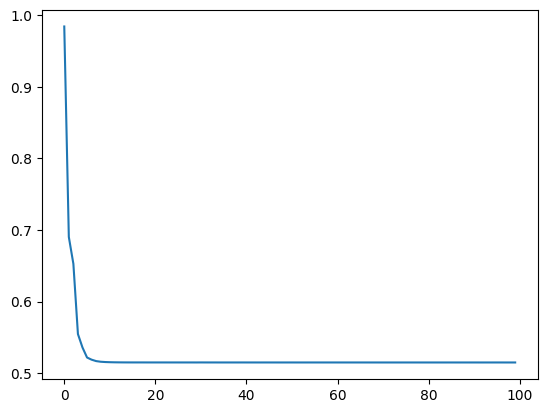

In [9]:
import matplotlib.pyplot as plt
# loss map 
plt.plot(train_result.history['loss'])


In [10]:
# make prediction for the images 
def predict(frame):
  # input_img = keras.Input(shape=(7920,))

  # encoded = layers.Dense(7920, activation='relu')(input_img)
  # encoded = layers.Dense(4096, activation='relu')(encoded)
  # encoded = layers.Dense(1024, activation='relu')(encoded)
  # encoded = layers.Dense(256, activation='relu')(encoded)
  # encoded = layers.Dense(64, activation='relu')(encoded)

  # encoded = layers.Dense(32, activation='relu')(encoded)

  # decoded = layers.Dense(64, activation='relu')(encoded)
  # decoded = layers.Dense(256, activation='relu')(decoded)
  # decoded = layers.Dense(1024, activation='relu')(decoded)
  # decoded = layers.Dense(4096, activation='relu')(decoded)
  # decoded = layers.Dense(7920, activation='sigmoid')(decoded)

  # autoencoder = keras.Model(input_img, decoded)
  # autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  # autoencoder.load_weights("autoencoder.weights.h5")
  frame = np.array(im.resize((IM_WIDTH, IM_HEIGHT)))
  image = frame.astype(np.float32) / 255
  im.close()
  frame = np.array(image).reshape(-1, np.prod(image.shape))
  loss = autoencoder.evaluate(frame, frame, verbose=0)
  return loss > 0.5169, loss

In [11]:
real_frame = 0
fake_frame = 0
for filename in os.listdir(SOURCE_FOLDER):
  im = Image.open(SOURCE_FOLDER + "/" + filename)
  isAnomy, loss = predict(im)
  if isAnomy:
    # print(filename, str(loss))
    real_frame += 1
  else:
    fake_frame += 1
  im.close()

In [12]:
# predicted real and fake images
print(f"Real Count: {real_frame}")
print(f"Fake Count: {fake_frame}")

Real Count: 212
Fake Count: 838
